In [3]:
import pandas as pd
import numpy as np

In [4]:
#%pip install pandas
#%pip install torch
#%pip install sentence-transformers

In [5]:
# below is the datatset annotated by Jay
data = pd.read_csv('final_dataset_06102022 2.csv')

In [6]:
print(data.shape)

(846, 96)


In [7]:
strs = ["end his life", "end her life", "end my life", "end their lives", "ended his life", "ended her life", "ended my life", "ended their lives", "ending his life", "ending her life", "ending my life", "ending their lives", "ends his life", "ends her life", "ends my life", "ends their lives", "kill oneself", "kill himself", "kill herself", "kill theirselves", "kill myself", "killed oneself", "killed himself", "killed herself", "killed theirselves", "killed myself", "killing oneself", "killing himself", "killing herself", "killing theirselves", "killing myself", "kills oneself", "kills himself", "kills herself", "kills theirselves", "kills myself", "murder oneself", "murder himself", "murder herself", "murder theirselves", "murder myself", "murdered oneself", "murdered himself", "murdered herself", "murdered theirselves", "murdered myself", "murdering oneself", "murdering himself", "murdering herself", "murdering theirselves", "murdering myself", "murders oneself", "murders himself", "murders herself", "murders theirselves", "murders myself", "poison oneself", "poison himself", "poison herself", "poison theirselves", "poison myself", "poisoned oneself", "poisoned himself", "poisoned herself", "poisoned theirselves", "poisoned myself", "poisoning oneself", "poisoning himself", "poisoning herself", "poisoning theirselves", "poisoning myself", "poisons oneself", "poisons himself", "poisons herself", "poisons theirselves", "poisons myself", "drown oneself", "drown himself", "drown herself", "drown theirselves", "drown myself", "drowned oneself", "drowned himself", "drowned herself", "drowned theirselves", "drowned myself", "drowning oneself", "drowning himself", "drowning herself", "drowning theirselves", "drowning myself", "drowns oneself", "drowns himself", "drowns herself", "drowns theirselves", "drowns myself", "strangle oneself", "strangle himself", "strangle herself", "strangle theirselves", "strangle myself", "strangled oneself",  "strangled himself", "strangled herself", "strangled theirselves", "strangled myself", "strangling oneself", "strangling himself", "strangling herself", "strangling theirselves", "strangling myself", "strangles oneself", "strangles himself", "strangles herself", "strangles theirselves", "strangles myself", "suffocate oneself", "suffocate himself", "suffocate herself", "suffocate theirselves", "suffocate myself", "suffocated oneself", "suffocated himself", "suffocated herself", "suffocated theirselves", "suffocated myself", "suffocating oneself", "suffocating himself", "suffocating herself", "suffocating theirselves", "suffocating myself", "suffocates oneself", "suffocates himself", "suffocates herself", "suffocates theirselves", "suffocates myself", "jump to his death", "jump to her death", "jump to their death", "jump to my death", "jumped to his death", "jumped to her death", "jumped to their death", "jumped to my death", "jumping to his death", "jumping to her death", "jumping to their death", "jumping to my death", "jumps to his death", "jumps to her death", "jumps to their death", "jumps to my death", "hang himself", "hang oneself", "hang herself", "hang themselves", "hang myself", "hung himself", "hung oneself", "hung herself", "hung themselves", "hung myself", "hanging himself", "hanging oneself", "hanging herself", "hanging themselves", "hanging myself", "hangs himself", "hangs oneself", "hangs herself", "hangs themselves", "hangs myself", "hungs himself", "hungs oneself", "hungs herself", "hungs themselves", "hungs myself", "shoot oneself", "shoot himself", "shoot herself", "shoot myself", "shoot theirselves", "shot oneself", "shot himself", "shot herself", "shot myself", "shot theirselves", "shooting oneself", "shooting himself", "shooting herself", "shooting myself", "shooting theirselves", "shoots oneself", "shoots himself", "shoots herself", "shoots myself", "shoots theirselves", "shots oneself", "shots himself", "shots herself", "shots myself", "shots theirselves", "die by his hand", "die by his own hand", "die by her hand", "die by her own hand", "die by their hands", "die by their own hands", "die by my hand", "die by my own hand", "take his life", "take his own life", "take her life", "take her own life", "take their lives", "take their own lives", "take my life", "take my own life", "took his life", "took his own life", "took her life", "took her own life", "took their lives", "took their own lives", "took my life", "took my own life", "takes his life", "takes his own life", "takes her life", "takes her own life", "takes their lives", "takes their own lives", "takes my life", "takes my own life", "taking his life", "taking his own life", "taking her life", "taking her own life", "taking their lives", "taking their own lives", "taking my life", "taking my own life","cut oneself", "cut himself", "cut herself", "cut theirselves", "cut myself", "cuts oneself", "cuts himself", "cuts herself", "cuts theirselves", "cuts myself", "cutting oneself", "cutting himself", "cutting herself", "cutting theirselves", "cutting myself", "stab oneself", "stab himself", "stab herself", "stab theirselves", "stab myself", "stabs oneself", "stabs himself", "stabs herself", "stabs theirselves", "stabs myself", "stabbing oneself", "stabbing himself", "stabbing herself", "stabbing theirselves", "stabbing myself", "stabbed oneself", "stabbed himself", "stabbed herself", "stabbed theirselves", "stabbed myself", "cut his throat", "cut her throat", "cut my throat", "cuts his throat", "cuts her throat", "cuts my throat", "cutting his throat", "cutting her throat", "cutting my throat", "cut his wrist", "cut her wrist", "cut my wrist", "cuts his wrist", "cuts her wrist", "cuts my wrist", "cutting his wrist", "cutting her wrist", "cutting my wrist", "slit his throat", "slit her throat", "slit my throat", "slits his throat", "slits her throat", "slits my throat", "slitting his throat", "slitting her throat", "slitting my throat", "slit his wrist", "slit her wrist", "slit my wrist", "slits his wrist", "slits her wrist", "slits my wrist", "slitting his wrist", "slitting her wrist", "slitting my wrist"]

In [8]:
data = data[data['Yes'] == 1]

In [9]:
pattern = r'^news[0-6]_'
datacopy = data.copy()
datacopy['Document name'] = data['Document name'].str.replace(pattern, '', regex=True)

In [10]:
data.head(3)
print(data.shape)

(200, 96)


In [11]:
import torch  
from transformers import BertTokenizer,BertModel

/Users/minijain/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
from sentence_transformers import SentenceTransformer,util
from sentence_transformers import models, util, datasets, evaluation, losses
from torch.utils.data import DataLoader

# Define your sentence transformer model using CLS pooling
#model_name = 'sentence-transformers/all-MiniLM-L6-v2'
#word_embedding_model = models.Transformer(model_name)
#print(word_embedding_model.get_word_embedding_dimension())
#pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(), 'cls')
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

In [13]:
print(model.max_seq_length)
#model.max_seq_length = 500
print(model.max_seq_length)

384
384


In [14]:
FinancialLabel = "Financial/Job Problem"
Legallabel = "Legal Problem"
SchoolLabel = "School or Academic Related Problem"
HealthLabel = "Lack of Access to Health/Mental Health Care"

In [15]:
relevant = data[data['Yes']==1]
print(relevant.shape)
print(data.shape)

financial_problem = data[data[FinancialLabel] > 0]
school_problem = data[data[SchoolLabel] > 0]
legal_problem = data[data[Legallabel] > 0]
health_problem = data[data[HealthLabel] > 0]
unspecified_circumstance = data[data['Unspecified Circumstance'] > 0]

print("Legal Problem : ", legal_problem.shape[0])
print("Financial/Job Problem : ", financial_problem.shape[0])
print("Lack of Access to Health/Mental Health Care : ", health_problem.shape[0])
print("School or Academic Related Problem : ", school_problem.shape[0])
print("")
print("Other non structural factors: ")

print("Explicit Statement of Mental Health Symptoms or Diagnosis : ", data[data['Explicit Statement of Mental Health Symptoms or Diagnosis'] > 0].shape[0])
print("Social/Relationship Problem : ", data[data['Social/Relationship Problem'] > 0].shape[0])
print("Physical Health Problem : ", data[data['Physical Health Problem'] > 0].shape[0])
print("Crisis plus-minus 2 weeks : ", data[data['Crisis plus-minus 2 weeks'] > 0].shape[0])
print("Loss of Sense of Purpose or Hope: ", data[data['Loss of Sense of Purpose or Hope'] > 0].shape[0])
print("History of Child Abuse : ", data[data['History of Child Abuse'] > 0].shape[0])
print("Lack of Social Support : ", data[data['Lack of Social Support'] > 0].shape[0])
print("Death of Friend or Family Member : ", data[data['Death of Friend or Family Member'] > 0].shape[0])
print("Alcohol Dependence : ", data[data['Alcohol Dependence'] > 0].shape[0])
print("Other Substance Problem : ", data[data['Other Substance Problem'] > 0].shape[0])
print("Disengaged in Activities : ", data[data['Disengaged in Activities'] > 0].shape[0])
print("Access to Means to Harm Self : ", data[data['Access to Means to Harm Self'] > 0].shape[0])
print("Other Circumstance: ", data[data['Other Circumstance'] > 0].shape[0])
print("Unspecified Circumstance: ", data[data['Unspecified Circumstance'] > 0].shape[0])

(200, 96)
(200, 96)
Legal Problem :  39
Financial/Job Problem :  13
Lack of Access to Health/Mental Health Care :  7
School or Academic Related Problem :  5

Other non structural factors: 
Explicit Statement of Mental Health Symptoms or Diagnosis :  35
Social/Relationship Problem :  30
Physical Health Problem :  26
Crisis plus-minus 2 weeks :  8
Loss of Sense of Purpose or Hope:  11
History of Child Abuse :  6
Lack of Social Support :  6
Death of Friend or Family Member :  2
Alcohol Dependence :  2
Other Substance Problem :  7
Disengaged in Activities :  0
Access to Means to Harm Self :  2
Other Circumstance:  8
Unspecified Circumstance:  56


In [34]:
school_problem_df = pd.DataFrame(school_problem, columns=['Document group', 'Document name'])
arrayoftexts = []
wordcount = 0.0
for documentname in school_problem_df['Document name']:
    #print(documentname)
    with open("articles/"+ documentname + ".txt") as f:
        text = f.readlines()
        arrayoftexts.append(text[0])
        wordcount += len(text[0].split())
avgwordcount = wordcount/len(arrayoftexts)

school_problem_df['Text'] = arrayoftexts

school_problem_embeddings = []

for text in school_problem_df['Text']:
    embedding = model.encode(text)
    school_problem_embeddings.append(embedding)

school_problem_averaged_embedding = np.mean(school_problem_embeddings, axis = 0)
print("Average word count: ", avgwordcount)


Average word count:  1285.6


In [ ]:
combinedfewshot = "Suicide is the act of intentionally causing one's own death or taking their own life by any means. You are a public health professional. You are going through news articles from across the USA that mention suicide and your task is to identify whether financial struggles or problems related to their job/profession or an incident at their place of employment influenced or led to the suicide talked about in the article. The article may not use the word ‘suicide’, instead explain it in another way, such as ‘he took his own life’ or a different expression that has the same meaning. Suicide in news reports can be expressed in various terms, such as mentioning the act of suicide, or mentioning that someone killed themselves, or someone ended their own life or someone took their own life and other similar expressions. \n You have to categorize the articles in one or more of the following categories: \n\n 1) 'Financial/Job Problem' : If there is mention of a person or multiple people who killed themselves primarily due to financial or work related struggles or an incident at their place of employment. \n 2) ‘School Problem' : If there is mention of a person or multiple people who killed themselves primarily due to an incident at school or an academic/school problem experienced by them. \n 3) 'Health Problem' : if there is mention of a person or multiple people who killed themselves primarily due to lack of access to mental or physical health care or treatment. \n 4) ‘Legal Problem' : If there is mention of a person or multiple people who killed themselves primarily after facing a law related problem or being involved or suspected in a violation of the law by the authorities. \n 5) ‘None’ : If there is no mention of a person committing suicide or if the reason of suicide is not aligned with any of the above 4 categories. \n\n Following are the examples of news articles talking about suicide and the answer to which category it falls into along with the reasoning behind that answer:\n\n Article: a suicide in texas there is a strange fiction that dominates american college campuses. it is the belief that america’s most “tolerant,” progressive, and sensitive communities are simultaneously virtual hellholes for marginalized members of the community, justifying emergency   measures designed to end oppression and defend the defenseless. thus, the federal government hypes false statistics that a staggering 20 percent of female students will be victims of sexual assault. thus, campuses implement disciplinary practices and policies that deny due process and treat straight men as guilty until proven innocent. and, colleges claim, it’s all necessary. after all, rape and sexual harassment represent   traumas. false accusations and unjust punishment? well, that’s just a momentary inconvenience  —   a small price to pay for the cause of social justice. tell that to the family of thomas klocke, a student at the university of texas at arlington. the competing factual accounts are simple and difficult to resolve. a gay student accused klocke (who was straight) of typing “gays should die” into the search bar of his browser during a classroom conversation about privilege. when the gay student then typed into his own computer, “i’m gay. ” klocke then allegedly said that the gay student was a “faggot” and that he should consider killing himself. klocke’s account was diametrically opposed. he claimed that the gay student called him “beautiful. ” klocke then typed into his web browser, “stop, i’m straight. ” the gay student replied, “i’m gay” and then allegedly kept glancing at klocke, who eventually got up and moved seats. the dean then allegedly assigned the case to the school’s associate director of academic integrity, who promptly issued an order prohibiting klocke not only from contacting his accuser, he also prohibited him from attending the class where the incident occurred, and  —   crucially  —   from contacting any member of the class, directly or through any other person. later, he reportedly barred klocke’s father, an attorney, from attending a meeting regarding the case, and then “decided” the dispute without following   procedures, without giving klocke the opportunity to contact or call witnesses, and indeed without hearing from any witness who could corroborate either student’s claims. the school, for its part, denies that it departed from mandatory processes and asserts that it “followed its policies and procedures. ” the associate director of academic integrity found klocke responsible for “harassment,” placed him on probation for the remainder of his academic career at the university, and prohibited him from returning to the class where the incident occurred, though he could work on “group projects outside the classroom. ” parents of college boys sometimes take comfort that they can avoid the atmosphere of   hysteria by asking them to follow some relatively simple, commonsense guidelines. don’t drink too much. don’t engage the   culture. use basic manners so that coarse talk isn’t misconstrued. no advice is foolproof, of course, but following those three guidelines  —   in addition to being virtuous on their own merits  —   will help avoid a multitude of problems. not for klocke, however. if his account is true (the university claims it followed proper procedures) then he was doing everything right. he was minding his own business in class, declined an unwelcome sexual advance, and changed seats. if his account is true, a gay student potentially motivated by embarrassment or fear was able to take advantage of the known bias of campus administrators to punish the man that he approached. during my own legal career, i’ve worked with students who’ve experienced many of the same things that thomas klocke’s family claims that he experienced. i’ve represented students whose parents were barred from disciplinary meetings, leaving them to face the wrath of administrators alone. but there’s something else i’ve seen. i’ve seen the cost imposed on students accused of misconduct  —   the fear and the stress as they feel like their reputations, their careers, and their dreams are vanishing before their very eyes. suicide is a complicated phenomenon, and i have no doubt that additional facts will emerge as the case works its way through the judicial system, but no one  —   ever  —   should believe that crackdowns come without cost or that due process is an abstract concept, a mere inconvenience that stands in the way of social justice. one doesn’t minimize sexual assault or sexual harassment by preserving due process. it is not a matter of either protecting the rights of the accuser or respecting the rights of the accused. instead, due process is a basic human right. failing to respect that right inflicts its own unique form of trauma on students, and sometimes that trauma can carry with it horrifying consequences. \n Answer: School Problem, Legal Problem \n Reasoning: The article mentions the suicide of Thomas klocke due to wrongful accusations at his school. \n\n Article: veteran commits suicide in parking lot of long island v.a.    navy veteran peter a. kaisen, of islip, new york, killed himself in the parking lot of the northport veterans affairs medical center on sunday after reportedly being turned away for emergency care. [“kaisen served in the u. s. navy from 1958 to 1962, working on the uss denebola, a ship that delivered refrigerated items and equipment to ships in the fleet,” according to his friend thomas farley, as cited by fox news.   after leaving the navy, kaisen went to work for the long beach police department, where he was severely injured in a car accident, causing him to rely on pain medication over the following decades. the new york times quotes two sources connected to the northport va medical center who said kaisen came there on sunday seeking   care for a mental health issue but was turned away.  according to these sources, the e. r. staff did not tell kaisen that the mental health facility was open 24 hours a day, and a psychologist was on call. for what it’s worth, the long island press notes the medical center’s website claims, “there is always a caring mental health doctor available   in our emergency room. ” he then went to the parking lot outside the medical center’s nursing home facility, where newsday says he was found “bleeding and unresponsive” after shooting himself. although the hospital is currently denying that kaisen presented himself to the emergency room, the new york times’s anonymous sources were scathing in their criticism. “he went to the e. r. and was denied service. and then he went to his car and shot himself,” said one source, identified as a hospital employee. “someone dropped the ball. they should not have turned him away. ” the times reports this is yet another va facility with a troubled history: the northport hospital has been under scrutiny for mismanagement and poor care since the new york times reported in may that it had closed all five of its operating rooms for months after   black particles began falling from air ducts. the office of representative lee zeldin, a republican whose first congressional district is on long island, had been looking into the allegations, eric amidon, mr. zeldin’s chief of staff, said in an email to the times in june. newsday reports that u. s. house representatives steve israel and peter king sent a letter to fbi director james comey on thursday demanding an “expeditious and transparent investigation” of the incident. the fbi was already involved in the case because kaisen’s death occurred on federal property, but there was no suspicion of criminal activity, and kaisen is believed to have been alone when he died. “i’m a vietnam vet  —   disabled from agent orange  —   and he was always looking out for me. he was such a faithful guy. he was such a big advocate for veterans and that’s what makes it’s so sad,” kaisen’s friend thomas farley told fox news. kaisen’s work for his fellow veterans might not be finished yet. “your death is not in vain. through your tragedy, may the bureaucrats change policies to help others that were in your situation,” read one message left on the funeral home’s website, quoted by the long island press. \n Answer: Health Problem \n Reasoning: The article talks about peter a. kaisen who committed suicide by shooting himself due to denial of mental health care at the local veteran care facility. \n\n Article: when should hacking be legal?  when aaron swartz, a prominent programmer and digital activist, was arrested in 2011, he was halfway through a fellowship at harvard’s center for ethics. police took him in after he entered a computer closet at mit and downloaded enormous amounts of data from jstor’s extensive database of academic research. swartz was charged with 13 felonies, 11 of them based on the computer fraud and abuse act, or cfaa. some of the charges hinged on violations of jstor’s terms of service, which prohibit bulk, automated downloads that prevent other customers from accessing its documents. faced with the possibility of decades in prison and up to a million dollars in fines, swartz took his own life in 2013. the ordeal brought cfaa —  a      law that has been updated half a dozen times to keep up with new technology —  under intense scrutiny.   activists decried the law for its vague definitions of “unauthorized access” to a computer, and for punishing researchers and academics who analyze and pick apart computer systems they don’t own or operate. some members of congress tried (and then tried again) to roll back elements of the law, including those that have been used to criminalize    violations. but a bill sponsored by representative zoe lofgren and senator ron wyden —  a pair of   democrats —  died in 2013, and is currently stalled after being reintroduced in 2015. the lawmakers named their bill “aaron’s law” after swartz. now, a group of academic researchers and journalists is suing the government, challenging the constitutionality of part of cfaa. with the help of the american civil liberties union, they’re targeting the portion of the law that makes it illegal to break private companies’ terms of service, claiming that the rule violates researchers’ and journalists’ rights to conduct research and investigations in the public interest, as guaranteed by the first amendment. they come in the form of the seemingly endless blocks of lawyerly fine print that pop up as you sign up for a new service —  the ones nearly every user clicks through without reading. but although they’re an individual’s agreement with a company, cfaa makes violating them a federal crime. one pair of researchers —  christian sandvig, of the university of michigan, and karrie karahalios, of the university of illinois —  is examining   websites, and the other pair —  alan mislove and christo wilson of northeastern university —  is looking at hiring websites. both projects are trying to determine whether the sites serve different search results, listings, and ads to users that appear to be from minority groups. to do so, they’re creating an army of fake profiles and tweaking them to look like they belong to a diverse set of people. but using that tactic —  one that’s very popular among researchers —  could make the professors felons: the terms of most online services, including the largest employment and   websites, prohibit creating multiple profiles, falsifying profile information, and scraping publicly available information with automated scripts. the lawsuit argues that testing for biases is essential to enforcing the fair housing act, which prohibits discrimination in home rentals or sales, and the civil rights act, which bans discrimination in hiring. in the suit, aclu lawyers point out that the government has conducted nationwide undercover testing for illegal biases in housing since the 1970s, and that courts have repeatedly upheld the rights of   testers. the researchers want to know if a user whose profile indicates she’s black will be served different apartments or jobs than one whose profile indicates he’s white. as long as attempts to reform cfaa in congress are stalled, challenging the law in court may be the only way to move the needle. if the case sees any success, it could even breathe life back into aaron’s law, or a similar bill. but until the law is changed, researchers who break companies’ terms of service for work have to keep looking over their shoulders for   corporate lawyers —  or federal prosecutors. \n Answer: Legal Problem \n Reasoning: The article talks about the suicide of Aaron Swartz, whi killed himself after being charged with computer fraud and abuse and facing a hefty penalty of millions and a jail setence spanning decades. \n\n Article: was a va. firefighter humiliated by co-workers online before she killed herself?  the trolls were horrid to her while she was alive. and they continued to be awful after her death. fairfax county firefighter nicole mittendorff, 31, killed herself in virginia’s shenandoah national park, the state medical examiner concluded. but even after the search for her was over, her body was identified and memorial candles began to burn, the cyberbullies  —   who claimed they were her fellow firefighters  —   kept scorching away at mittendorff online.  petula is a columnist for the washington post’s local team who writes about homeless shelters, gun control, high heels, high school choirs, the politics of parenting, jails, abortion clinics, mayors, modern families, strip clubs and gas prices, among other things. view archive   facebook google+ rss   if these trolls are actually members of her firehouse family, then mittendorff becomes another example of a new form of workplace harassment. instead of happening in the office, it happens publicly online.  there is an investigation at mittendorff’s firehouse to find out who posted the vicious online attacks and whether they played a role in her suicide.  “we at fairfax fire and rescue are aware of the posts and are looking into the matter. i assure you that my department can not and will not tolerate bullying of any kind,” fairfax county fire chief richard bowers wrote in a public statement saturday. “we will thoroughly investigate this matter and take any appropriate actions needed. ”   fairfax county fire chief richard bowers said he has ”zero tolerance” for bullying after online postings raise questions about whether firefighter nicole mittendorff was bullied before her death. mittendorf’s body was found in virginia’s shenandoah national park last week. (wusa 9)    [searchers find body thought to be missing fairfax firefighter]   mittendorff’s case offers a chilling window into the persistent harassment women encounter on a daily basis online and at work. in fact, those two forms of ugliness appear to be merging. it means sexual harassment isn’t just   bosses pawing at a secretary or men disparaging female   at the water cooler. it can happen from a home computer and devastate a woman’s reputation and career. “it seems to be a newer thing, doing this online,” said angela hughes, a baltimore county fire captain who is also president of the international association of women in fire and emergency medical services. “cyberbullying on   outlets is a new form of harassment. ” her group gets frequent requests for help from firefighters who believe they are being harassed, threatened or mistreated because of their gender. but recently, the group has seen more online bullying, including some facebook pages that actively harass female firefighters. the problem, she said, is that a firehouse fosters a culture of toughness, of not needing help. and too often, harassment goes on because it’s against the culture to ask for help. online harassment gets directed at   women on social media and by online commenters all the time. the women of wgn, a local television station in chicago, recently took on their abusers when they read some of the nastiest emails, tweets and facebook posts  —   attacks on their weight, their voices, their faces. “keep shoving food down that   of yours,” morning anchor robin baumgarten said, quoting one message. [broadcasters read their rudest comments online]  and we’ve seen it in gamergate, where women in the   world are continually blasted online. that scandal started with feminist   reviewer anita sarkeesian, who had to cancel a university speaking engagement two years ago because one of her many persistent and vulgar online harassers threatened a mass shooting if she spoke. and recently it included zoe quinn, a   developer who was smeared online with death threats and lurid details about her sex life by other gamers and an   who didn’t like her game. from a to z, they get hazed. this brand of workplace harassment operates outside the world of those surveys, workshops and seminars that company lawyers make everyone take, which do nothing to reduce sexism, but only exist to thwart lawsuits in case a caveman boss demands sex for a promotion. even if the trolls ripping mittendorff apart online didn’t work with her, those posts were up there to shame her for her career choice and belittle her within her career. this subversive yet simultaneously very public sexual harassment is becoming increasingly common. we know women still face    harassment in   fields: the military, law enforcement, science, the tech sector. even the women who work for the national park service have offered horror stories. and it’s especially prevalent in firefighting, where i found case after case  —   in rhode island, arizona, utah, florida  —   of women winning sexual harassment cases against their departments in just the past couple of years. in federal reports, congressional testimony, courtroom testimony, personal essays and formal complaints, we hear the same story. women continue to be harassed, belittled, passed over and manipulated by their male   or bosses. \n Answer: Financial/Job Problem \n Reasoning: The article talks about a female firefighter who killed herself after being harassed and bullied by her co-workers online. \n\n Now, read the following news article answer the following 2 questions: \n 1. Is there mention of a person or multiple people who died after committing suicide or killed themselves? Provide your answer in the following format: \n Answer 1: Yes or No  \n 2. Identify which of the above categories does the article belong to. An article can belong to more than one category. Also provide a reasoning for the same in the following format:\n Answer 2: \n Reasoning: \n\n Article: "

In [35]:
legal_problem_df = pd.DataFrame(legal_problem, columns=['Document group', 'Document name'])
arrayoftexts = []
wordcount = 0.0
for documentname in legal_problem_df['Document name']:
    #print(documentname)
    with open("articles/"+ documentname + ".txt") as f:
        text = f.readlines()
        arrayoftexts.append(text[0])
        wordcount += len(text[0].split())
avgwordcount = wordcount/len(arrayoftexts)

legal_problem_df['Text'] = arrayoftexts

legal_problem_embeddings = []

for text in legal_problem_df['Text']:
    embedding = model.encode(text)
    legal_problem_embeddings.append(embedding)

legal_problem_averaged_embedding = np.mean(legal_problem_embeddings, axis = 0)
print("Average word count: ", avgwordcount)


Average word count:  1058.4615384615386


In [36]:
# # all the legal problem articles matched wit the averaged legal problem embedding
# sentences = arrayoftexts

# #Encode all sentences
# embeddings = model.encode(sentences)

# #Compute cosine similarity between all pairs
# #cos_sim = util.cos_sim(embeddings, embeddings)
# cos_sim = util.cos_sim(embeddings, legal_problem_averaged_embedding)
# print(cos_sim)

In [37]:
financial_problem_df = pd.DataFrame(financial_problem, columns=['Document group', 'Document name'])
arrayoftexts = []
wordcount = 0.0
for documentname in financial_problem_df['Document name']:
    #print(documentname)
    with open("articles/"+ documentname + ".txt") as f:
        text = f.readlines()
        arrayoftexts.append(text[0])
        wordcount += len(text[0].split())
avgwordcount = wordcount/len(arrayoftexts)

financial_problem_df['Text'] = arrayoftexts

financial_problem_embeddings = []

for text in financial_problem_df['Text']:
    embedding = model.encode(text)
    financial_problem_embeddings.append(embedding)

financial_problem_averaged_embedding = np.mean(financial_problem_embeddings, axis = 0)
print("Average word count: ", avgwordcount)


Average word count:  1497.6153846153845


In [38]:
health_problem_df = pd.DataFrame(health_problem, columns=['Document group', 'Document name'])
arrayoftexts = []
wordcount = 0.0
for documentname in health_problem_df['Document name']:
    #print(documentname)
    with open("articles/"+ documentname + ".txt") as f:
        text = f.readlines()
        arrayoftexts.append(text[0])
        wordcount += len(text[0].split())
avgwordcount = wordcount/len(arrayoftexts)

health_problem_df['Text'] = arrayoftexts

health_problem_embeddings = []

for text in health_problem_df['Text']:
    embedding = model.encode(text)
    health_problem_embeddings.append(embedding)

health_problem_averaged_embedding = np.mean(health_problem_embeddings, axis = 0)
print("Average word count: ", avgwordcount)


Average word count:  949.5714285714286


In [39]:
all_embeddings = financial_problem_embeddings + legal_problem_embeddings + school_problem_embeddings + health_problem_embeddings

labels = []
for i in range(len(financial_problem_embeddings)):
    labels.append(FinancialLabel)
for i in range(len(legal_problem_embeddings)):
    labels.append(Legallabel)
for i in range(len(school_problem_embeddings)):
    labels.append(SchoolLabel)
for i in range(len(health_problem_embeddings)):
    labels.append(HealthLabel)

### Processing of articles with cause 'Unspecified Circumstance'

In [40]:
unspecified_circumstance_df = pd.DataFrame(unspecified_circumstance, columns=['Document group', 'Document name'])
arrayoftexts = []
wordcount = 0.0
for documentname in unspecified_circumstance_df['Document name']:
    #print(documentname)
    with open("articles/"+ documentname + ".txt") as f:
        text = f.readlines()
        arrayoftexts.append(text[0])
        wordcount += len(text[0].split())
avgwordcount = wordcount/len(arrayoftexts)

unspecified_circumstance_df['Text'] = arrayoftexts

unspecified_circumstance_embeddings = []

for text in unspecified_circumstance_df['Text']:
    embedding = model.encode(text)
    unspecified_circumstance_embeddings.append(embedding)

print("Average word count: ", avgwordcount)


Average word count:  1164.625


In [41]:
cos_sim_unspecified_circumstance_financial = util.cos_sim(unspecified_circumstance_embeddings, financial_problem_averaged_embedding)
cos_sim_unspecified_circumstance_legal = util.cos_sim(unspecified_circumstance_embeddings, legal_problem_averaged_embedding)
cos_sim_unspecified_circumstance_school = util.cos_sim(unspecified_circumstance_embeddings, school_problem_averaged_embedding)
cos_sim_unspecified_circumstance_health = util.cos_sim(unspecified_circumstance_embeddings, health_problem_averaged_embedding)


/Users/minijain/Library/Python/3.9/lib/python/site-packages/sentence_transformers/util.py:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:264.)
  a = torch.tensor(a)


In [42]:
print("Max similarity of unspecified circumstance for financial problem: ", torch.max(cos_sim_unspecified_circumstance_financial))
print("Max similarity of unspecified circumstance for legal problem: ", torch.max(cos_sim_unspecified_circumstance_legal))
print("Max similarity of unspecified circumstance for school problem: ", torch.max(cos_sim_unspecified_circumstance_school))
print("Max similarity of unspecified circumstance for health problem: ", torch.max(cos_sim_unspecified_circumstance_health))

Max similarity of unspecified circumstance for financial problem:  tensor(0.6352)
Max similarity of unspecified circumstance for legal problem:  tensor(0.6567)
Max similarity of unspecified circumstance for school problem:  tensor(0.4912)
Max similarity of unspecified circumstance for health problem:  tensor(0.5768)


In [43]:
print(arrayoftexts[torch.argmax(cos_sim_unspecified_circumstance_financial)])
print(arrayoftexts[torch.argmax(cos_sim_unspecified_circumstance_legal)])
print(arrayoftexts[torch.argmax(cos_sim_unspecified_circumstance_school)])
print(arrayoftexts[torch.argmax(cos_sim_unspecified_circumstance_health)])

pride and pain in trump country: ’we all grew up poor, but we had a community’ on a recent sunday evening, 30 people come to worship in a wooden home by the side of a kentucky county road. a handmade tin sign nailed to a lightpost announces “the house of worship, everyone welcome”. inside, congregants fan themselves, waiting to take their turn at the pulpit. the church doesn’t have a minister and anyone is welcome. the service doesn’t end until everyone who wishes to has sung, read or preached. josh bailey, 14 years free of alcohol, riffs for 20 minutes, mixing scripture with stories of his past. “i used to drink all the time, until i discovered the lord. ain’t never had a buzz like jesus christ. ” josh and his wife jenny have, he says, “nothing beyond their children and their faith in jesus christ”. they receive a disability check (he has seizures) and payments for the odd jobs she finds. they don’t have a car, so getting to the church requires a ride from a neighbor. another member h

In [44]:
import csv
texts = ["Financial/Job Problem", "Legal Problem", "School or Academic Related Problem", "Lack of Access to Health/Mental Health Care"] 
embeddingsize = len(financial_problem_averaged_embedding)
header = [i for i in range(embeddingsize)]
header.insert(0, "Structural Violence Factor")



In [45]:
embeddings_final = [financial_problem_averaged_embedding.tolist(), legal_problem_averaged_embedding.tolist(), school_problem_averaged_embedding.tolist(), health_problem_averaged_embedding.tolist()]
for i in range(len(embeddings_final)):
    embeddings_final[i].insert(0, texts[i])

with open('averaged_embeddings.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(embeddings_final)

### Starting processing of unseen articles from the Kaggle dataset (aka which are suicide related but not marked 'Yes')

In [16]:
# below three are the csvs downloaded from the Kaggle 'All the news' dataset as is
data1 = pd.read_csv('articles1.csv')
data2 = pd.read_csv('articles2.csv')
data3 = pd.read_csv('articles3.csv')

data1 = data1[data1['content'].str.contains('|'.join(strs))]
data2 = data2[data2['content'].str.contains('|'.join(strs))]
data3 = data3[data3['content'].str.contains('|'.join(strs))]

print("Articles from the Kaggle dataset that have matching suicide terms: ", data1.shape[0] + data2.shape[0] + data3.shape[0])

ids200 = datacopy['Document name']
numericalids = [int(i) for i in ids200.to_list()]
data1 = data1[~data1['id'].isin(numericalids)]
data2 = data2[~data2['id'].isin(numericalids)]
data3 = data3[~data3['id'].isin(numericalids)]

content1 = data1['content'].tolist()
content2 = data2['content'].tolist()
content3 = data3['content'].tolist()
unseen_articles = content1 + content2 + content3
print(len(unseen_articles))

Articles from the Kaggle dataset that have matching suicide terms:  1285
(366, 10)
(525, 10)
(394, 10)
1285


In [49]:
unseen_articles_embeddings = []
for content in unseen_articles:
    embedding = model.encode(content)
    unseen_articles_embeddings.append(embedding)

In [50]:
cos_sim_unseen_financial = util.cos_sim(unseen_articles_embeddings, financial_problem_averaged_embedding)
cos_sim_unseen_legal = util.cos_sim(unseen_articles_embeddings, legal_problem_averaged_embedding)
cos_sim_unseen_school = util.cos_sim(unseen_articles_embeddings, school_problem_averaged_embedding)
cos_sim_unseen_health = util.cos_sim(unseen_articles_embeddings, health_problem_averaged_embedding)


In [51]:
print("Max similarity for financial problem: ", torch.max(cos_sim_unseen_financial))
print("Max similarity for legal problem: ", torch.max(cos_sim_unseen_legal))
print("Max similarity for school problem: ", torch.max(cos_sim_unseen_school))
print("Max similarity for health problem: ", torch.max(cos_sim_unseen_health))

Max similarity for financial problem:  tensor(0.7170)
Max similarity for legal problem:  tensor(0.7375)
Max similarity for school problem:  tensor(0.8385)
Max similarity for health problem:  tensor(0.7996)


In [52]:
print("Min similarity for financial problem: ", torch.min(cos_sim_unseen_financial), )
print("Min similarity for legal problem: ", torch.min(cos_sim_unseen_legal))
print("Min similarity for school problem: ", torch.min(cos_sim_unseen_school))
print("Min similarity for health problem: ", torch.min(cos_sim_unseen_health))

Min similarity for financial problem:  tensor(0.0192)
Min similarity for legal problem:  tensor(0.0135)
Min similarity for school problem:  tensor(-0.0184)
Min similarity for health problem:  tensor(-0.0738)


In [53]:
print(unseen_articles[torch.argmax(cos_sim_unseen_financial)])
print(unseen_articles[torch.argmax(cos_sim_unseen_legal)])
print(unseen_articles[torch.argmax(cos_sim_unseen_school)])
print(unseen_articles[torch.argmax(cos_sim_unseen_health)])

One issue that many wonder about is [Donald Trump’s] apparent lack of empathy. [The public spotlight has shone for decades upon his business career and his place in the entertainment world, which is why we often miss the empathetic side of him that many doubt exists. Remember that he spent seven years remorselessly firing people on a television program, and this “reality television” show largely imprinted the image that we regard today as the real Donald Trump.  But it was also Donald Trump who took Jennifer Hudson under his wing when her mother, brother, and nephew were gunned down in Chicago, offering her a free apartment at Trump Tower while she grieved. She was never charged for her stay and was able to feel safe. In 1988, Trump helped    Andrew Ten, a boy who needed to fly to New York for special medical attention. The airline refused to let him board the plane because of his bulky medical equipment. Trump was informed of the issue and immediately sent his private jet to take the 

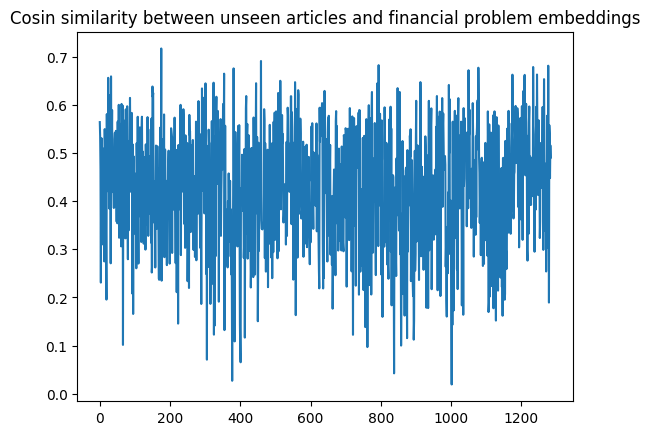

In [54]:
x = [i for i in (range(cos_sim_unseen_financial.shape[0]))]
#print(x)
import matplotlib.pyplot as plt
flattened = cos_sim_unseen_financial.flatten()
plt.title('Cosin similarity between unseen articles and financial problem embeddings')
plt.plot(x, flattened)



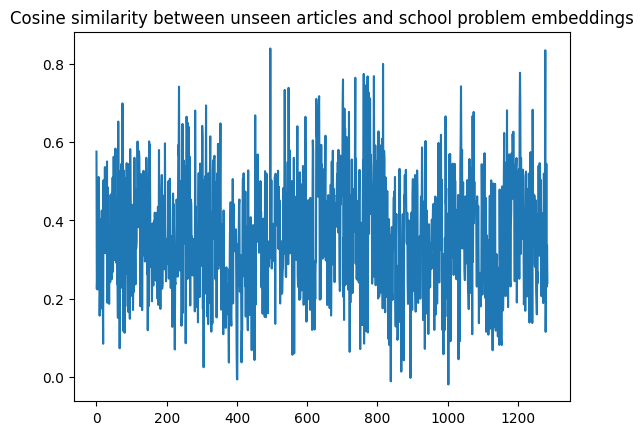

In [55]:
x = [i for i in (range(cos_sim_unseen_school.shape[0]))]
#print(x)
import matplotlib.pyplot as plt
flattened = cos_sim_unseen_school.flatten()
plt.title('Cosine similarity between unseen articles and school problem embeddings')
plt.plot(x, flattened)

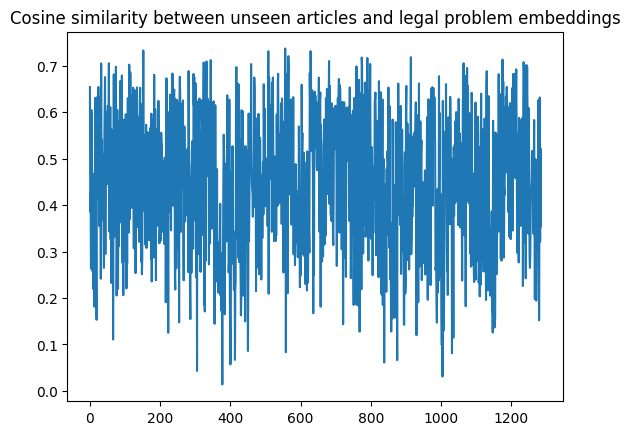

In [56]:
x = [i for i in (range(cos_sim_unseen_legal.shape[0]))]
#print(x)
import matplotlib.pyplot as plt
flattened = cos_sim_unseen_legal.flatten()
plt.title('Cosine similarity between unseen articles and legal problem embeddings')
plt.plot(x, flattened)

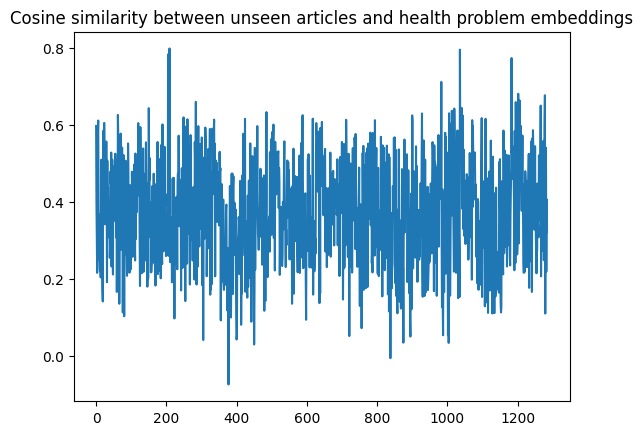

In [57]:
x = [i for i in (range(cos_sim_unseen_health.shape[0]))]
#print(x)
import matplotlib.pyplot as plt
flattened = cos_sim_unseen_health.flatten()
plt.title('Cosine similarity between unseen articles and health problem embeddings')
plt.plot(x, flattened)

In [58]:

print("Mean cosine similarity of all articles for financial problem ", torch.mean(cos_sim_unseen_financial))
print("Mean cosine similarity of all articles for legal problem ", torch.mean(cos_sim_unseen_legal))
print("Mean cosine similarity of all articles for school problem ", torch.mean(cos_sim_unseen_school))
print("Mean cosine similarity of all articles for health problem ", torch.mean(cos_sim_unseen_health))

print("Standard deviation of cosine similarity of all articles for financial problem ", torch.std(cos_sim_unseen_financial))
print("Standard deviation of cosine similarity of all articles for legal problem ", torch.std(cos_sim_unseen_legal))
print("Standard deviation of cosine similarity of all articles for school problem ", torch.std(cos_sim_unseen_school))
print("Standard deviation of cosine similarity of all articles for health problem ", torch.std(cos_sim_unseen_health))

Mean cosine similarity of all articles for financial problem  tensor(0.4269)
Mean cosine similarity of all articles for legal problem  tensor(0.4471)
Mean cosine similarity of all articles for school problem  tensor(0.3593)
Mean cosine similarity of all articles for health problem  tensor(0.3728)
Standard deviation of cosine similarity of all articles for financial problem  tensor(0.1189)
Standard deviation of cosine similarity of all articles for legal problem  tensor(0.1478)
Standard deviation of cosine similarity of all articles for school problem  tensor(0.1468)
Standard deviation of cosine similarity of all articles for health problem  tensor(0.1327)


### Experiments on Kaggle news dataset finished

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/minijain/Downloads/SocWebLab/Structural_Violence/kaggle200_gpt48kzeroshotresults.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'Document group', 'Document name', 'Created by',
       'Created', 'Modified by', 'Modified', 'Coded Segments', 'Memos',
       'PDF Pages',
       ...
       'White', 'Race/Ethnicity', 'content', 'Financial - Predicted',
       'School - Predicted', 'Health - Predicted', 'Legal - Predicted',
       'None - Predicted', 'Reasoning', 'Error'],
      dtype='object', length=105)